# Solutions to the exercises

This notebook contains the solutions to the exercises presented on the other notebooks. 

---

### CapyMOA 

* More information about CapyMOA can be found in: [https://github.com/adaptive-machine-learning/CapyMOA](https://github.com/adaptive-machine-learning/CapyMOA)

* _If you find CapyMOA useful, considering starring the project and joining the Discord channel!_

* **KDD 2024 tutorial** by [Heitor Murilo Gomes](https://heitorgomes.com/) and [Albert Bifet](https://albertbifet.com/). Barcelona, Spain (26/08/2024), 

**Code examples are based on CapyMOA v0.8.0 as of 26/08/2024**

# Exercises (Introduction)

## 1. Improve predictive performance.

Using `RTG_2abrupt` stream try to improve the predictive performance of the Hoeffding Tree algorithm by changing its hyperparameters (See the Hoeffding Tree's [API reference](https://capymoa.org/api/modules/capymoa.classifier.HoeffdingTree.html)). 


<span style="color:red">Expected solution:</span> Try different combinations of hyperparameters for the Hoeffding Tree, such as the split confidence and grace period. 

**More details/Tips**
* The synthetic stream snapshot `RTG_2abrupt` includes 100,000 instances. 
* To plot the same learner under different names, you can override the `learner` attribute in the results from `prequential_evaluation` as shown in the sample code below.

[HT default] Cumulative Accuracy: 57.677
[HT gp50] Cumulative Accuracy: 57.994
[HT conf0.1] Cumulative Accuracy: 63.053000000000004
[HT gp50 conf0.0001] Cumulative Accuracy: 59.567


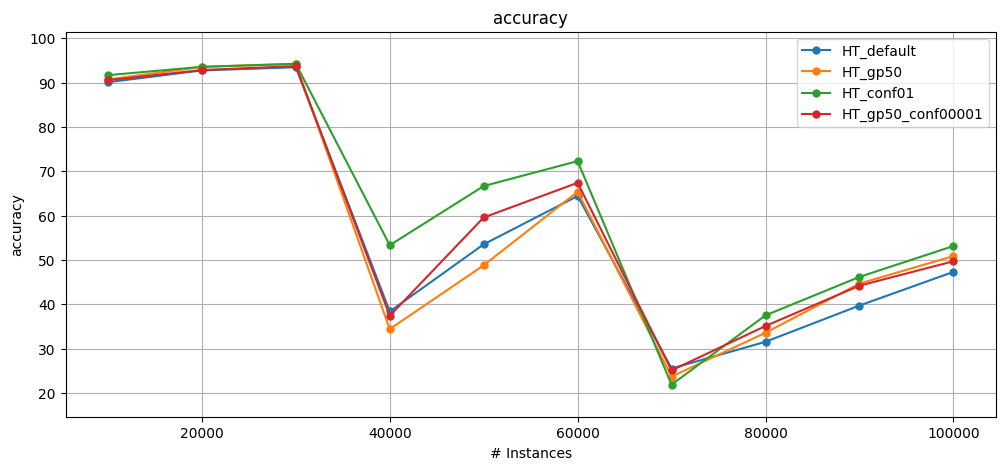

In [1]:
from capymoa.datasets import RTG_2abrupt
from capymoa.classifier import HoeffdingTree
from capymoa.evaluation import prequential_evaluation
from capymoa.evaluation.visualization import plot_windowed_results


rtg2_stream = RTG_2abrupt()
ht_default = HoeffdingTree(schema=rtg2_stream.get_schema())

# For example, we are trying different combinations of 
# * grace_period: The number of instances a leaf should observe between split attempts; and
# confidence: the allowable error in split decision, values closer to 0 will take longer to decide
ht_gp50 = HoeffdingTree(schema=rtg2_stream.get_schema(), grace_period=50)
ht_conf01 = HoeffdingTree(schema=rtg2_stream.get_schema(), confidence=0.1)
ht_gp50_conf00001 = HoeffdingTree(schema=rtg2_stream.get_schema(), grace_period=50, confidence=0.0001)

results = prequential_evaluation(stream=rtg2_stream, learner=ht_default, window_size=10000)
results.learner = 'HT_default'

results_ht_gp50 = prequential_evaluation(stream=rtg2_stream, learner=ht_gp50, window_size=10000)
results_ht_gp50.learner = 'HT_gp50'
results_ht_conf01 = prequential_evaluation(stream=rtg2_stream, learner=ht_conf01, window_size=10000)
results_ht_conf01.learner = 'HT_conf01'
results_ht_gp50_conf00001 = prequential_evaluation(stream=rtg2_stream, learner=ht_gp50_conf00001, window_size=10000)
results_ht_gp50_conf00001.learner = 'HT_gp50_conf00001'

print(f'[HT default] Cumulative Accuracy: {results.cumulative.accuracy()}')
print(f'[HT gp50] Cumulative Accuracy: {results_ht_gp50.cumulative.accuracy()}')
print(f'[HT conf0.1] Cumulative Accuracy: {results_ht_conf01.cumulative.accuracy()}')
print(f'[HT gp50 conf0.0001] Cumulative Accuracy: {results_ht_gp50_conf00001.cumulative.accuracy()}')

plot_windowed_results(results,results_ht_gp50,results_ht_conf01,results_ht_gp50_conf00001, metric='accuracy')

## 2. Assessing results using different metrics and approaches

Assess the results for the experiments below using the `Electricity` stream below using different metrics. You may also want to verify the windowed versions of the metrics (either in a plot or on a list/dataframe). 

What can be observed when comparing the results from a complex model such as ARF and the NoChange classifier using a metric like `kappa_t`? 

<span style="color:red">Expected solution:</span> Use the results.cumulative and results.windowed objects to inspect other metrics. When observing `kappa_t` we should notice that ARF only barely improves upon a naive baseline like NoChange classifier for this particular problem. This might indicate that this data depicts some temporal dependences. 

**More details/Tips**
* You can use the `cumulative` and `windowed` objects to access the metrics associated with a particular result from `prequential_evaluation`
* The available metrics are accessible through `metrics_header()` as shown in the example below

In [2]:
from capymoa.evaluation import prequential_evaluation
from capymoa.datasets import Electricity
from capymoa.classifier import NaiveBayes, NoChange, AdaptiveRandomForestClassifier

elec_stream = Electricity()
nb = NaiveBayes(schema=elec_stream.get_schema())
no_change = NoChange(schema=elec_stream.get_schema())
arf = AdaptiveRandomForestClassifier(schema=elec_stream.get_schema(), number_of_jobs=4)

results_nb = prequential_evaluation(stream=elec_stream, learner=nb, window_size=4500)
results_no_change = prequential_evaluation(stream=elec_stream, learner=no_change, window_size=4500)
results_arf = prequential_evaluation(stream=elec_stream, learner=arf, window_size=4500)

# The available metrics:
results_nb.metrics_header()

['instances',
 'accuracy',
 'kappa',
 'kappa_t',
 'kappa_m',
 'f1_score',
 'f1_score_0',
 'f1_score_1',
 'precision',
 'precision_0',
 'precision_1',
 'recall',
 'recall_0',
 'recall_1']

[Cumulative] No Change Accuracy: 85.33059675141243
[Windowed] No Change Accuracy: [83.86666666666667, 83.22222222222221, 85.31111111111112, 85.6, 84.04444444444444, 87.28888888888889, 87.82222222222222, 86.77777777777777, 85.17777777777778, 84.44444444444444, 84.6888888888889]
[Cumulative] Naive Bayes Accuracy: 73.36246468926554
[Windowed] Naive Bayes Accuracy: [80.11111111111111, 78.22222222222223, 77.08888888888889, 74.71111111111111, 70.44444444444444, 69.02222222222221, 63.77777777777778, 64.08888888888889, 78.26666666666667, 77.57777777777778, 78.35555555555555]
[Cumulative] ARF Accuracy: 82.67125706214689
[Windowed] ARF Accuracy: [82.02222222222221, 84.35555555555555, 83.82222222222222, 84.35555555555555, 84.77777777777777, 81.28888888888889, 79.73333333333333, 77.3111111111111, 81.33333333333333, 87.04444444444445, 87.24444444444444]


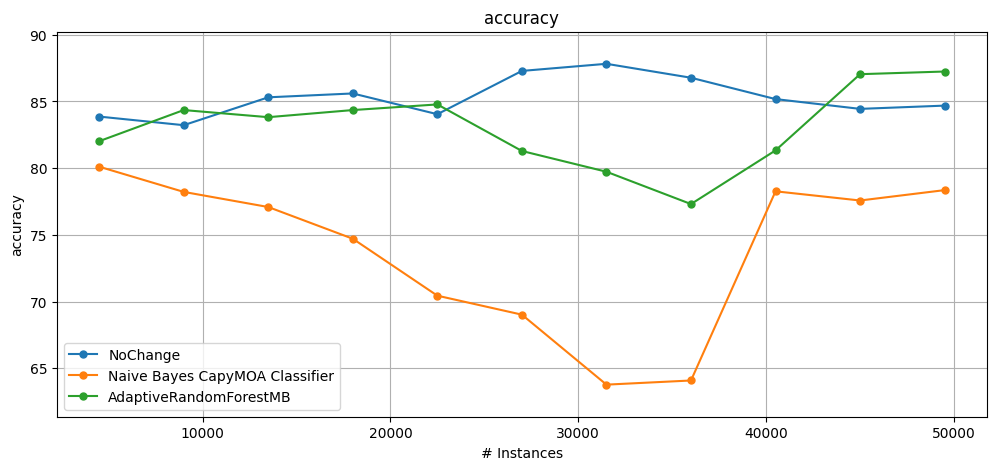

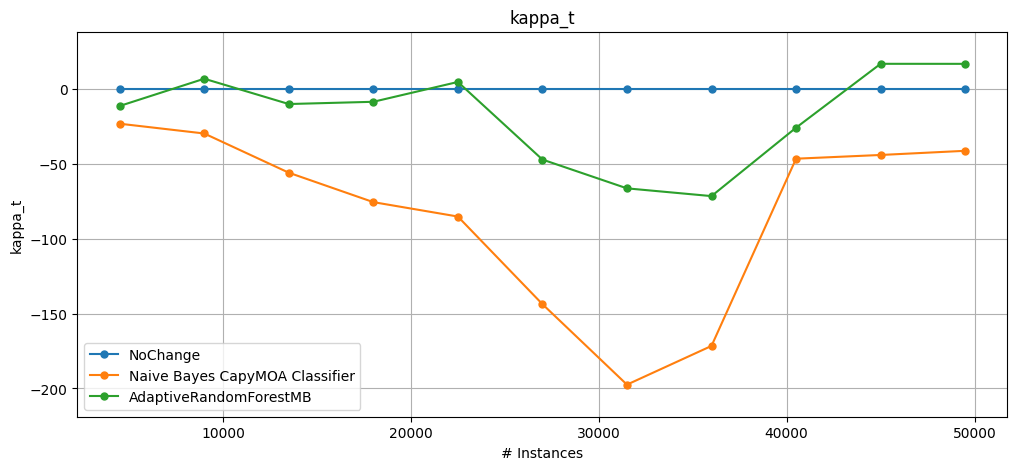

In [3]:
from capymoa.evaluation.visualization import plot_windowed_results

# Notice that observing the windowed results like this may not be that interesting, 
# you might want to consider display(results<...>.windowed.metrics_per_window()) as well

print(f'[Cumulative] No Change Accuracy: {results_no_change.cumulative.accuracy()}')
print(f'[Windowed] No Change Accuracy: {results_no_change.windowed.accuracy()}')

print(f'[Cumulative] Naive Bayes Accuracy: {results_nb.cumulative.accuracy()}')
print(f'[Windowed] Naive Bayes Accuracy: {results_nb.windowed.accuracy()}')

print(f'[Cumulative] ARF Accuracy: {results_arf.cumulative.accuracy()}')
print(f'[Windowed] ARF Accuracy: {results_arf.windowed.accuracy()}')

plot_windowed_results(results_no_change, results_nb, results_arf, metric='accuracy')

# Using kappa_t it becomes evident that some learners are no better than a simple baseline like No Change. 
# ARF still outperforms NoChange during some periods. 
plot_windowed_results(results_no_change, results_nb, results_arf, metric='kappa_t')

# Exercises (Drift)

# 1. Detect drifts based on a classifier output

Given the following synthetic stream with 1 abrupt concept drift, use SEED [Huang et al, 2014] to observe whether a drift has occurred based on the learner output, i.e. the correct and incorrect predictions. 

<span style="color:red">Expected solution:</span> Modify the code to start tracking the correct (1) and incorrect (0) predictions, and use this to update the drift detector. Keep checking the drift detector to verify whether a change has happened. 

**More details/Tips**
* The sample code below shows how we can define the stream and visualize it if we are using a high-level evaluation function such as `prequential_evaluation`
* To solve this exercise you will need to access each of the individual predictions by the learner, so we can't use `prequential_evaluation` and will use instead a `while loop`


**References**
```
Huang, David Tse Jung, et al. "Detecting volatility shift in data streams."
2014 IEEE International Conference on Data Mining. IEEE, 2014.
```


Cumulative accuracy: 66.39


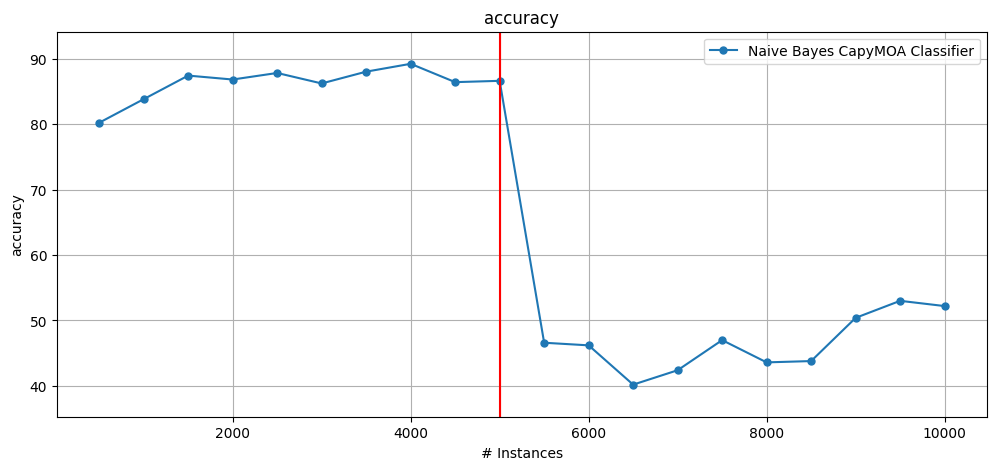

In [4]:
from capymoa.stream.drift import DriftStream, Drift, AbruptDrift, GradualDrift
from capymoa.stream.generator import AgrawalGenerator
from capymoa.classifier import NaiveBayes
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.drift.detectors import ADWIN


stream_sea1drift = DriftStream(stream=[AgrawalGenerator(classification_function=1), 
                                AbruptDrift(position=5000), 
                                AgrawalGenerator(classification_function=2)])

nb = NaiveBayes(schema=stream_sea1drift.get_schema())

results_nb = prequential_evaluation(stream=stream_sea1drift, learner=nb, window_size=500, max_instances=10000)

print(f'Cumulative accuracy: {results_nb.cumulative.accuracy()}')
plot_windowed_results(results_nb, metric='accuracy')

In [4]:
## Sample code

from capymoa.stream.drift import DriftStream, Drift, AbruptDrift, GradualDrift
from capymoa.stream.generator import AgrawalGenerator
from capymoa.classifier import NaiveBayes
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.drift.detectors import SEED

from capymoa.evaluation import ClassificationEvaluator


stream_sea1drift = DriftStream(stream=[AgrawalGenerator(classification_function=1), 
                                AbruptDrift(position=5000), 
                                AgrawalGenerator(classification_function=2)])

evaluator = ClassificationEvaluator(schema=stream_sea1drift.get_schema())

nb = NaiveBayes(schema=stream_sea1drift.get_schema())

# delta=0.05 (the default value) will generate some false positives
# delta=0.001 improves the overall performance of the detector for this example
detector = SEED(delta=0.001) 

i = 0
max_instances = 10000
while stream_sea1drift.has_more_instances() and i < max_instances:
    instance = stream_sea1drift.next_instance()
    pred = nb.predict(instance)
    evaluator.update(instance.y_index, pred)
    
    # <what should we keep track? In other words, what is the input to the drift detector? The correct and incorrect predictions>
    is_correct = int(pred == instance.y_index)
    
    # <how do we check if a drift has happened after updating the detector?>
    detector.add_element(is_correct)
    
    #if <...>
    #    print('Change detected at instance: ' + str(i))
    if detector.detected_change():
        print('Change detected at instance: ' + str(i))

    nb.train(instance)
    i += 1
print(evaluator.accuracy())

# How many drifts were detected? 
print(f'Number of drifts detected: {len(detector.detection_index)}')

Change detected at instance: 5087
66.39
Number of drifts detected: 1


# Exercises (Supervised Learning)

## 1. Implement a heterogeneous ensemble learner

Based on the sample code below implement an heterogeneous ensemble, i.e. an ensemble where the members may be any learner. 
This exercise looks like a lot, but in fact you just need to implement the training method :)

<span style="color:red">Expected solution:</span> This is a very simple example/exercise where you just need to update the ensemble training, which consists of iterating through the ensemble members and training on each of them. 

**More details/Tips**
* This exercise is based on a tutorial that shows how to create a new learner in capymoa (Available [here](https://capymoa.org/notebooks/05_new_learner.html)).


In [6]:
from capymoa.base import Classifier
from capymoa.classifier import HoeffdingTree, EFDT, NaiveBayes, KNN, HoeffdingAdaptiveTree, SGDClassifier

from collections import Counter
import numpy as np
import random
import math


# Must inherit from Classifier
class HeterogeneousEnsemble(Classifier):
    def __init__(self, schema=None, random_seed=1, base_learners_classes=[HoeffdingTree, NaiveBayes, HoeffdingAdaptiveTree]):
        super().__init__(schema=schema, random_seed=random_seed)

        self.ensemble_size = len(base_learners_classes)
        self.ensemble = []
        for i in range(self.ensemble_size):
            self.ensemble.append(base_learners_classes[0](schema=self.schema, random_seed=random_seed))

    def __str__(self):
        return 'HeterogeneousEnsemble'

    def train(self, instance):
        for i in range(len(self.ensemble)):
            self.ensemble[i].train(instance)

    def predict(self, instance):
        predictions = []
        for i in range(self.ensemble_size):
            predictions.append(self.ensemble[i].predict(instance))
        majority_vote = Counter(predictions)
        prediction = majority_vote.most_common(1)[0][0]
        return prediction
    
    # For this exercise we don't need to implement predict_proba
    def predict_proba(self, instance):
        pass

HeterogeneousEnsemble(HT, NB, HAT) accuracy: 81.72669491525424, wallclock: 2.2583370208740234
HeterogeneousEnsemble(KNN, EFDT, SGD) accuracy: 84.08147951977402, wallclock: 8.745290040969849


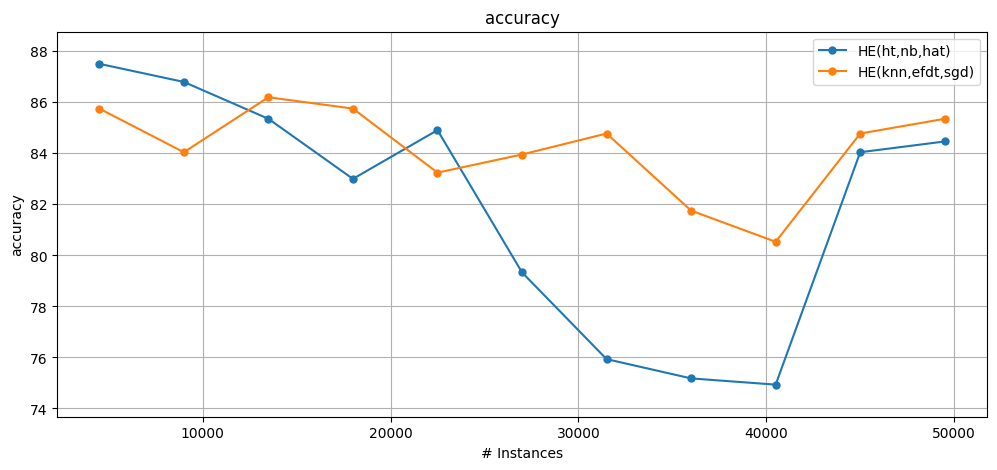

In [7]:
from capymoa.evaluation import prequential_evaluation
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.datasets import Electricity
from capymoa.classifier import HoeffdingTree
from capymoa.classifier import SGDClassifier

elec_stream = Electricity()

# Creating a learner: using a hoeffding adaptive tree as the base learner
ht_nb_hat = HeterogeneousEnsemble(schema=elec_stream.get_schema(), 
                                  base_learners_classes=[HoeffdingTree, NaiveBayes, HoeffdingAdaptiveTree])
knn_efdt_sgd = HeterogeneousEnsemble(schema=elec_stream.get_schema(),
                                   base_learners_classes=[KNN, EFDT, SGDClassifier])

results_ht_nb_hat = prequential_evaluation(stream=elec_stream, learner=ht_nb_hat, window_size=4500)
print(f"HeterogeneousEnsemble(HT, NB, HAT) accuracy: {results_ht_nb_hat.cumulative.accuracy()}, wallclock: {results_ht_nb_hat.wallclock()}")
results_knn_efdt_sgd = prequential_evaluation(stream=elec_stream, learner=knn_efdt_sgd, window_size=4500)
print(f"HeterogeneousEnsemble(KNN, EFDT, SGD) accuracy: {results_knn_efdt_sgd.cumulative.accuracy()}, wallclock: {results_knn_efdt_sgd.wallclock()}")

results_ht_nb_hat.learner = "HE(ht,nb,hat)"
results_knn_efdt_sgd.learner = "HE(knn,efdt,sgd)"
plot_windowed_results(results_ht_nb_hat, results_knn_efdt_sgd, metric="accuracy")

## 2. Create a Drift Detection Aware Learner

The following classifier is capable of detecting drifts based on the output of its base classifier (correct and incorrect predictions) and then reset the model whenever a drift is detected. You should try to improve the performance by implementing a heuristic that avoid resets if they are not at least `min_reset_window` apart. To further improve the overall predictive performance you can also modify the drift detector hyperparameters.

<span style="color:red">Expected solution:</span> This exercise is slightly more complicated than the previous one, but it also doesn't require a lot of changes to the code. The sample code already contains the drift detection and reset, we just need to update the if statement to consider the `min_reset_window` parameter, such that drifts are not triggered so often. Depending on the drift detector (SEED) configuration, we can use this simple heuristic to improve the predictive performance in comparison to a simple Hoeffding Tree. 


In [5]:
from capymoa.drift.detectors import ADWIN, SEED
from capymoa.classifier import HoeffdingTree
from capymoa.base import Classifier

class DriftDetectionClassifier(Classifier):
    def __init__(self, classifier, drift_detector, min_reset_window=100):
        # delegating schema and random_seed to be set by the super class 'Classifier' 
        super().__init__(schema=classifier.schema, random_seed=classifier.random_seed)

        self.classifier = classifier
        self.drift_detector = drift_detector
        # save the args in case we need to reset the classifier later
        self.classifier_args = self._get_init_args(classifier)

        self.instances_since_last_reset = 0

        self.min_reset_window = min_reset_window
        
        # Simple counter so that you can make sense of the detections
        self.instances_seen = 0
        
    def __str__(self):
        return 'DriftDetectionClassifier'

    def train(self, instance):
        self.instances_since_last_reset += 1
        
        self.instances_seen += 1        
        # monitors the correct/incorrect predictions
        pred = self.classifier.predict(instance)
        y = instance.y_index
        pred_equals_y = 1 if pred == y else 0
        
        self.drift_detector.add_element(pred_equals_y)

        # has a drift been detected? and when was the last drift? 
        if self.drift_detector.detected_change() and self.instances_since_last_reset > self.min_reset_window:
            self.instances_since_last_reset = 0
            print(f'Change detected at instance: {self.instances_seen}')
            self.reset()

        self.classifier.train(instance)

    def reset(self, schema=None):
        # obtain the class of the classifier and create a new one using the arguments saved before
        # print(type(**self.classifier_args))

        if schema is not None:
            self.classifier_args['schema'] = schema
        # print (self.classifier_args)
        self.classifier = self.classifier.__class__(schema=self.schema)
        
        self.classifier.__class__(**self.classifier_args)

    def predict(self, instance):
        return self.classifier.predict(instance)

    def predict_proba(self, instance):
        return self.classifier.predict_proba(instance)

    def _get_init_args(self, obj):
        # filter only the arguments needed for initialization
        init_args = {}
        for param in obj.__init__.__code__.co_varnames:
            if param in obj.__dict__:
                init_args[param] = obj.__dict__[param]
        return init_args

Change detected at instance: 3360
Change detected at instance: 6144
Change detected at instance: 9632
Change detected at instance: 11840
cumulative accuracy HT: 78.54666666666667 and DDC: 81.90666666666667


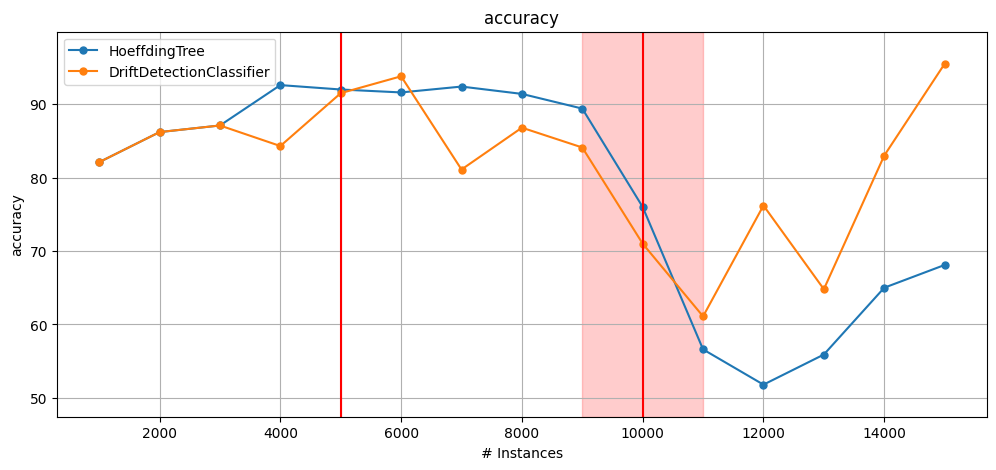

In [10]:
## Testing the DriftDetectionClassifier

from capymoa.stream.drift import DriftStream, Drift, AbruptDrift, GradualDrift
from capymoa.stream.generator import AgrawalGenerator
from capymoa.evaluation import prequential_evaluation
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.classifier import HoeffdingTree

stream_sea2drift = DriftStream(stream=[AgrawalGenerator(classification_function=1), 
                                AbruptDrift(position=5000), 
                                AgrawalGenerator(classification_function=3), 
                                GradualDrift(position=10000, width=2000), 
                                AgrawalGenerator(classification_function=1)])

# create the learner and detector
ht = HoeffdingTree(schema=stream_sea2drift.get_schema(), grace_period=50)

# Change ADWIN delta to adjust the detection sensibility
ddc = DriftDetectionClassifier(
    classifier=HoeffdingTree(schema=stream_sea2drift.get_schema(), grace_period=50), 
    drift_detector=SEED(delta=0.001),
    min_reset_window=2000 # By using 2000 we can obtain a better overall accuracy as it prevents too frequent resets
)

results_sea2drift_ht = prequential_evaluation(stream=stream_sea2drift, learner=ht, window_size=1000, max_instances=15000)
results_sea2drift_ddc = prequential_evaluation(stream=stream_sea2drift, learner=ddc, window_size=1000, max_instances=15000)

print(f"cumulative accuracy HT: {results_sea2drift_ht.cumulative.accuracy()} and DDC: {results_sea2drift_ddc.cumulative.accuracy()}")
plot_windowed_results(results_sea2drift_ht, results_sea2drift_ddc, metric='accuracy')